In [3]:
#import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


In [4]:
class_df = pd.read_csv(r"C:\Users\La'Cha\Documents\GWU Class Folder\Capstone Work\Datasets\ClassificadosPR.csv")
class_df

,Row Labels,Count of pueblo
0,West,1463
1,Aguadilla,382
2,Anasco,45
3,Cabo Rojo,345
4,Mayaguez,579
5,Rincon,112
6,Central,403
7,Aguas Buenas,131
8,Barranquitas,27
9,Cayey,12


In [5]:
MASTER = MASTER.drop(columns=['id', 'name', 
                     'Latitude','Longitude',,
                    , '])

In [14]:
#remove the columns in dataset where we won't be using
full_data= encoded_data.drop(columns=['Price'])

In [20]:
#full_data['BORO CAT'] = full_data['BORO'].cat.codes
#full_data['CUISINE CAT'] = full_data['CUISINE DESCRIPTION'].cat.codes

#full_data.head()

In [21]:
#removing boro and cuisine description due to data type
#removing the CAMIS and the BINNED column after running the model a few times, BINNED has little importance to model
#and CAMIS is creating complications to the model
#BINNED column is based on total critical fine

#full_data= full_data.drop(columns=['CAMIS','BORO', 'CUISINE DESCRIPTION', 'BINNED_Avg.CritFine'])

In [ ]:
import shap
import scikitplot as skplt

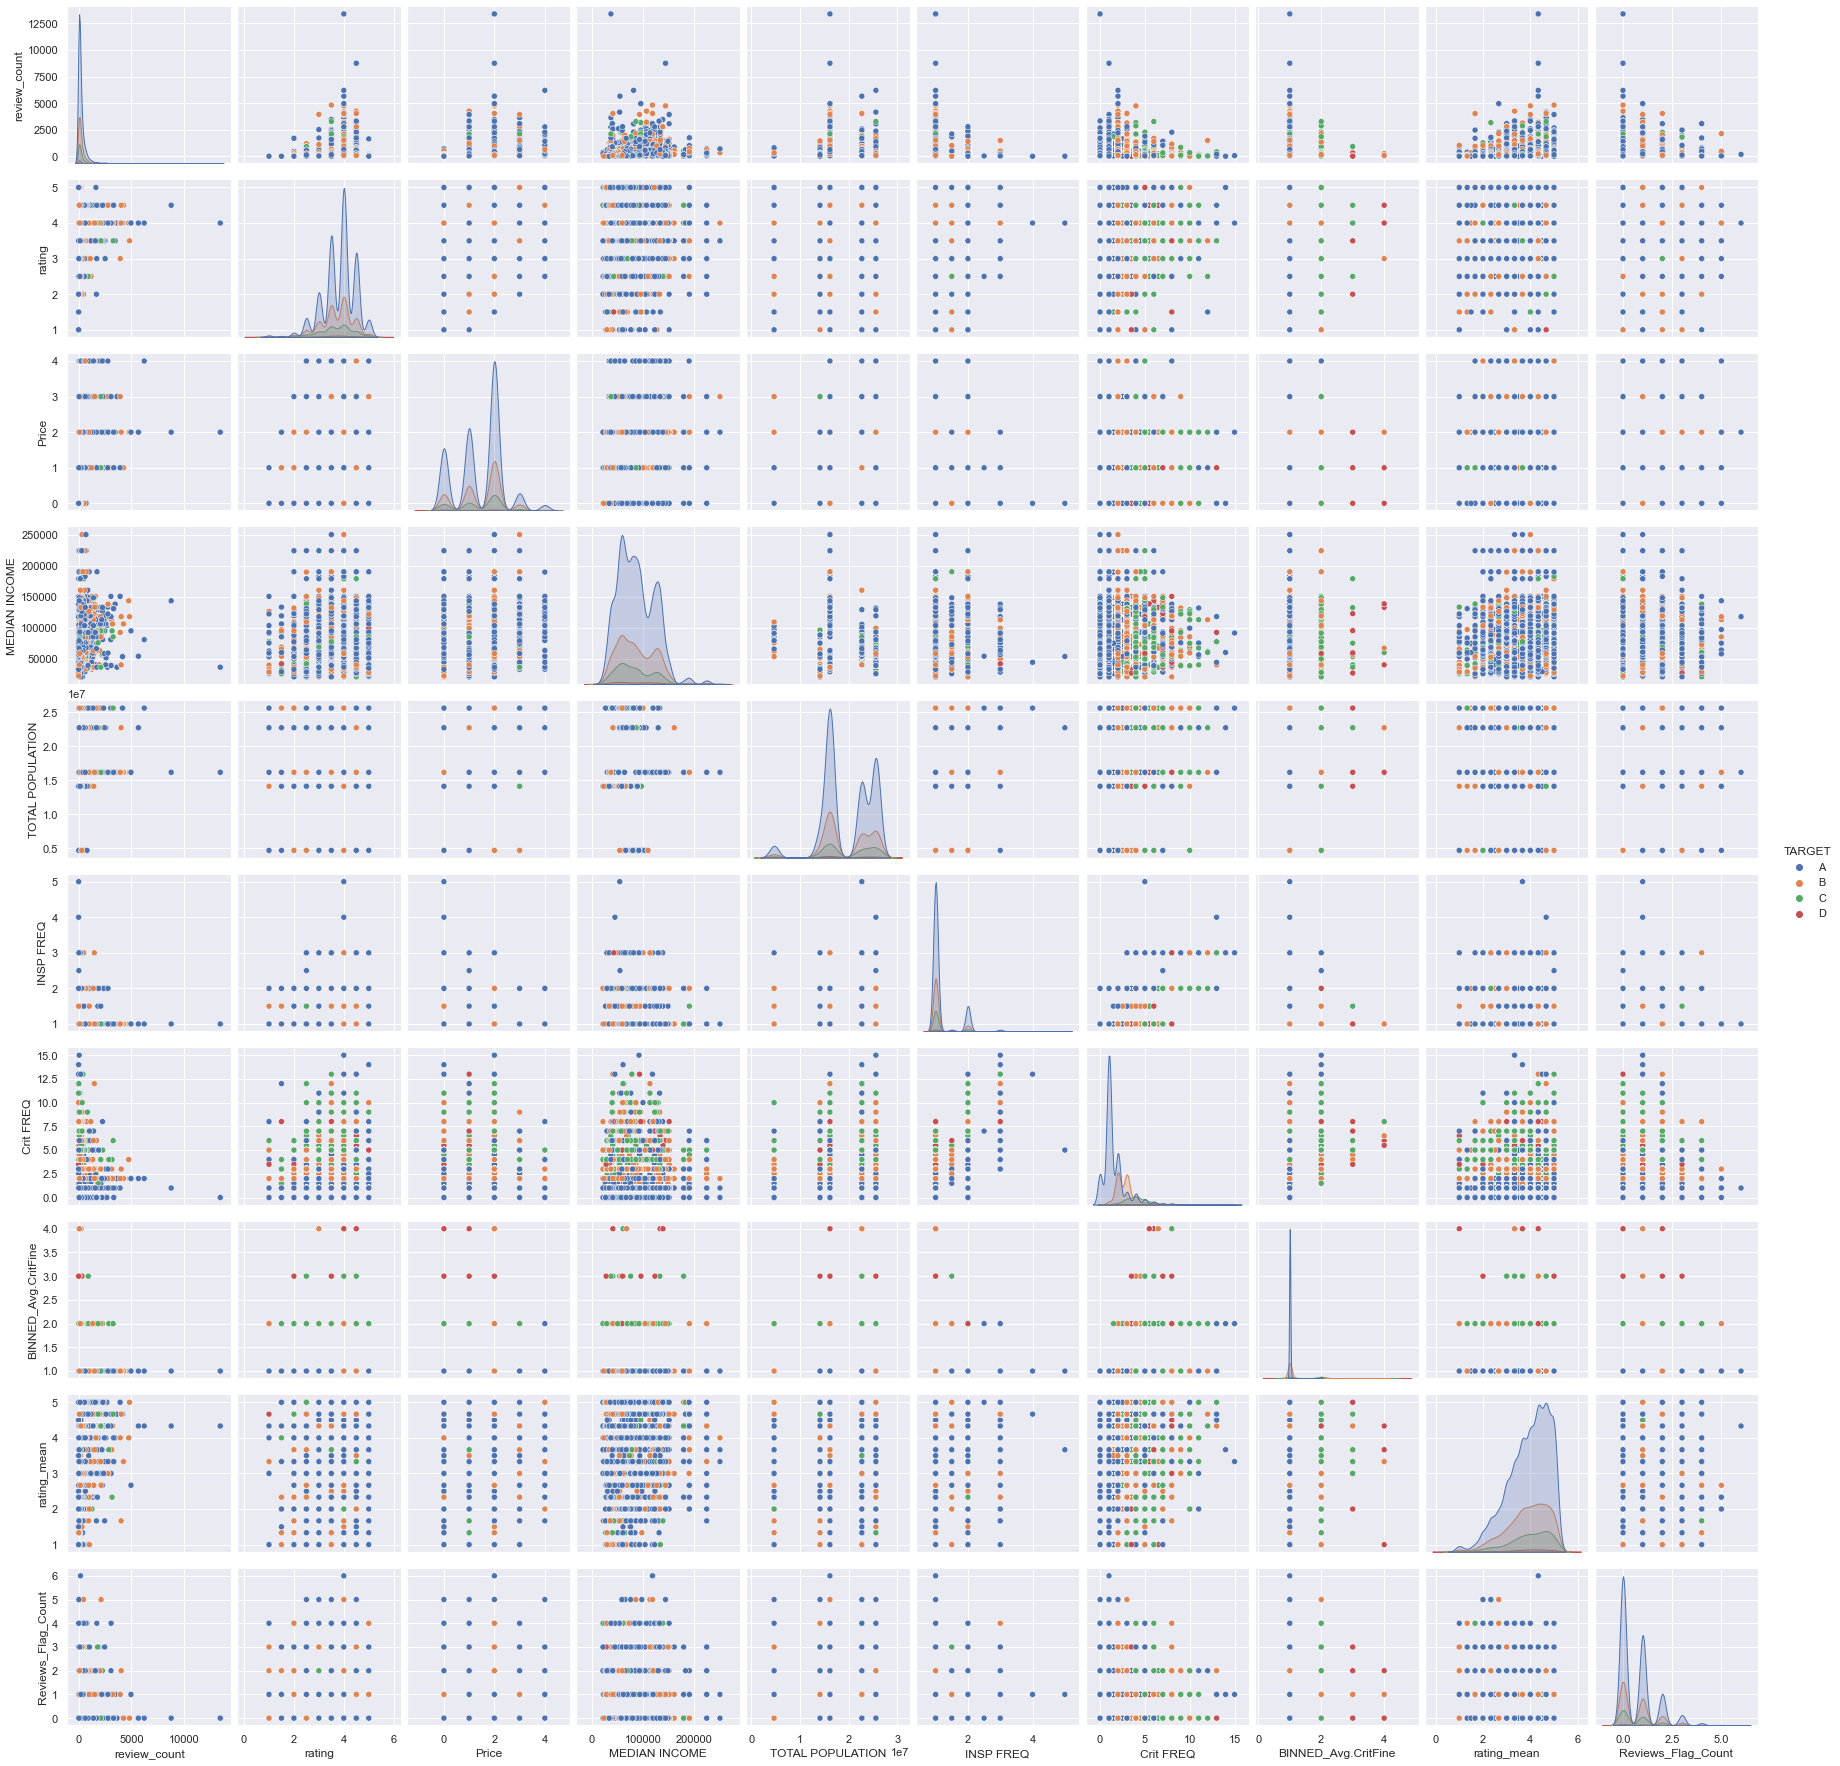

In [23]:
#plot data
sns.set()
sns.pairplot(full_data[['review_count','rating', 'Price', 'MEDIAN INCOME', 'TOTAL POPULATION', 
                   'INSP FREQ', 'Crit FREQ', 'BINNED_Avg.CritFine','rating_mean','Reviews_Flag_Count','TARGET']],
             hue="TARGET", diag_kind="kde")

In [25]:
#define x and y variables
y = full_data['TARGET']
#n_classes = y.shape[0]

#full_data.drop(['TARGET'], axis=1, inplace = True)
#x=full_data

x = predictors

In [26]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normed = pd.DataFrame(x_scaled)

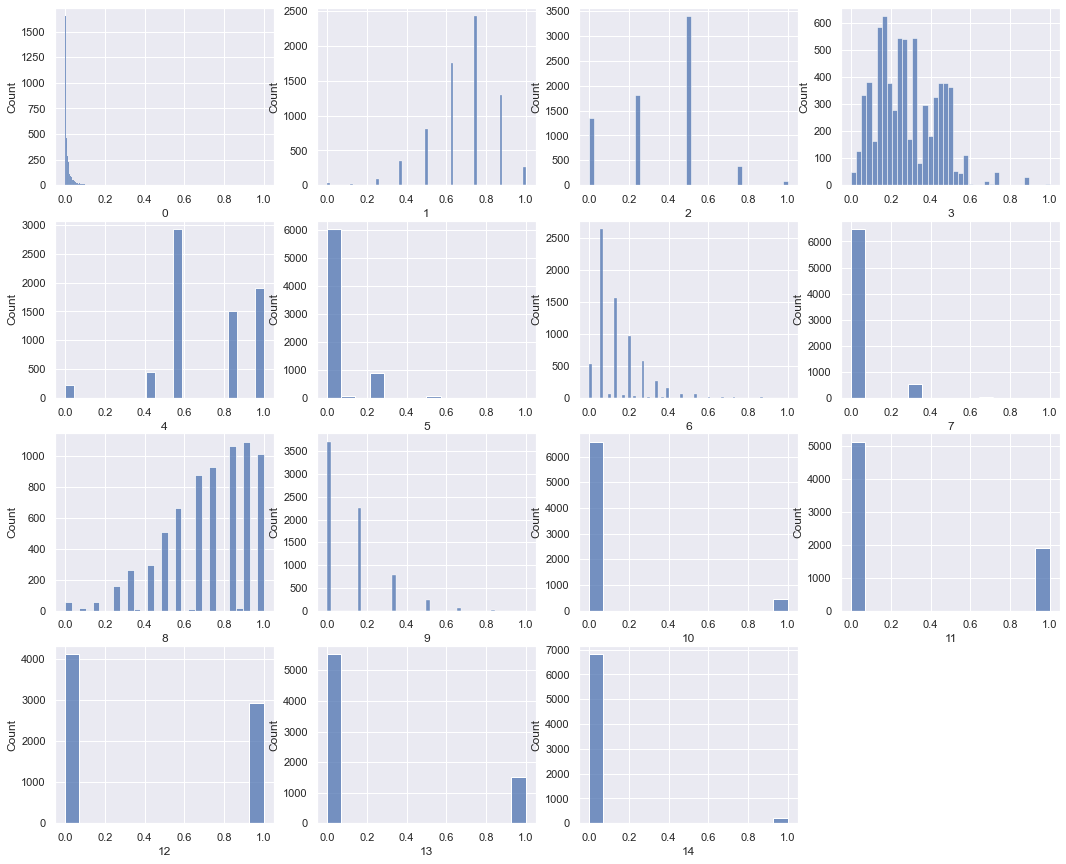

In [27]:
# more on displot: https://plotly.com/python/distplot/

plt.figure(figsize=(18,15))

for i, column in enumerate(df_normed.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(df_normed[column])

In [28]:
#import labelencoder - use when categorical is ordinal (true in our case) or there are too many categories in the parameter
from sklearn.preprocessing import LabelEncoder 
ly = LabelEncoder()
y= ly.fit_transform(y)

In [29]:
class_mapping = {l: i for i, l in enumerate(ly.classes_)}

class_mapping

{'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [30]:
#split data into training and test set
from sklearn.model_selection import train_test_split

seed = 77
test_size=.33

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

In [31]:
#x_train = pd.DataFrame(x_train, columns=x.columns)
#x_test = pd.DataFrame(x_test, columns=x.columns)


#ROC/AUC code: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [32]:
#use naive bayes classification, fit model, and check model accruacy
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB

gnb = OneVsRestClassifier(GaussianNB())
gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_test)
pred_prob_gnb = gnb.predict_proba(x_test)

from sklearn.metrics import accuracy_score

acc_gnb = accuracy_score(y_test,pred_gnb)
print("Accuracy: %.2f%%" % (acc_gnb * 100.0))

Accuracy: 65.45%


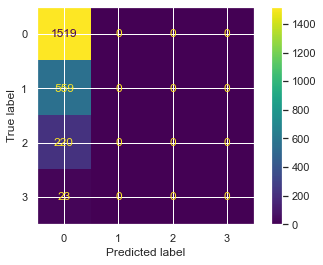

In [33]:
#print(confusion_matrix(y_test,pred_gnb, labels=gnb.classes_))

gnb_cm=confusion_matrix(y_test,pred_gnb, labels=gnb.classes_)
gnb_cmd=ConfusionMatrixDisplay(confusion_matrix=gnb_cm, display_labels=gnb.classes_)
gnb_cmd.plot()

In [34]:
print(classification_report(y_test,pred_gnb))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1519
           1       0.00      0.00      0.00       559
           2       0.00      0.00      0.00       220
           3       0.00      0.00      0.00        23

    accuracy                           0.65      2321
   macro avg       0.16      0.25      0.20      2321
weighted avg       0.43      0.65      0.52      2321



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


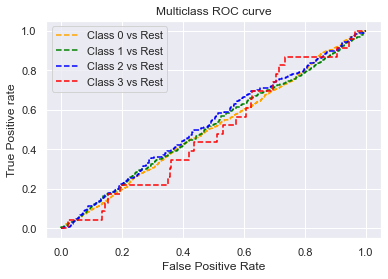

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_gnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [36]:
auc_gnb=roc_auc_score(y_test, gnb.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_gnb * 100.0))

AUC: 50.94%


# Logistic Regression

In [38]:
# use logistics regression, fit model, and check model accuracy
from sklearn.linear_model import LogisticRegression

logreg = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs',multi_class='auto'))
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
pred_prob_logreg = logreg.predict_proba(x_test)


acc_logreg = accuracy_score(y_test,pred_logreg)
print("Accuracy: %.2f%%" % (acc_logreg * 100.0))

Accuracy: 65.45%


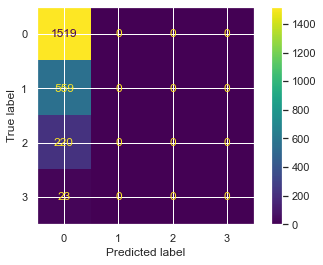

In [39]:
#print(confusion_matrix(y_test,pred_logreg))

logreg_cm=confusion_matrix(y_test,pred_logreg, labels=logreg.classes_)
logreg_cmd=ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=logreg.classes_)
logreg_cmd.plot()

In [40]:
print(classification_report(y_test,pred_logreg))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1519
           1       0.00      0.00      0.00       559
           2       0.00      0.00      0.00       220
           3       0.00      0.00      0.00        23

    accuracy                           0.65      2321
   macro avg       0.16      0.25      0.20      2321
weighted avg       0.43      0.65      0.52      2321



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


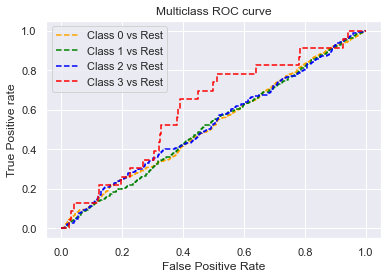

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_logreg[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [42]:
auc_logreg=roc_auc_score(y_test, logreg.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_logreg * 100.0))

AUC: 54.34%


# Decision Tree Classifier

In [44]:
# use decision tree, fit model, and check model accuracy
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
pred_prob_dt = dt.predict_proba(x_test)

acc_dt = accuracy_score(y_test,pred_dt)
print("Accuracy: %.2f%%" % (acc_dt * 100.0))


Accuracy: 76.00%


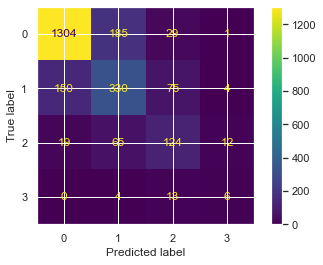

In [45]:
#print(confusion_matrix(y_test,pred_dt))

dt_cm=confusion_matrix(y_test,pred_dt, labels=dt.classes_)
dt_cmd=ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt.classes_)
dt_cmd.plot()

In [46]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1519
           1       0.57      0.59      0.58       559
           2       0.51      0.56      0.54       220
           3       0.26      0.26      0.26        23

    accuracy                           0.76      2321
   macro avg       0.56      0.57      0.56      2321
weighted avg       0.77      0.76      0.76      2321



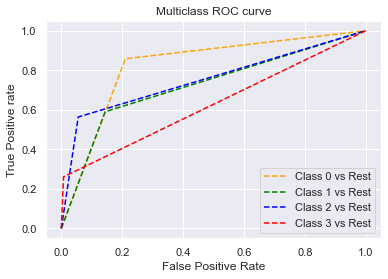

In [47]:
# roc curve for classes

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_dt[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  


In [48]:
#capture variable importance
dt_importances = dt.feature_importances_

In [50]:
auc_dt=roc_auc_score(y_test, dt.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_dt * 100.0))

AUC: 73.19%


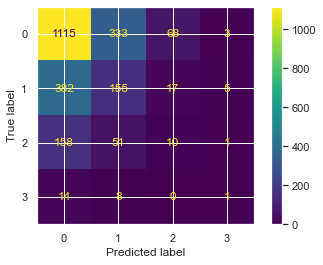

In [54]:
#print(confusion_matrix(y_test,pred_knn))

knn_cm=confusion_matrix(y_test,pred_knn, labels=knn.classes_)
knn_cmd=ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
knn_cmd.plot()

In [55]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1519
           1       0.28      0.28      0.28       559
           2       0.11      0.05      0.06       220
           3       0.10      0.04      0.06        23

    accuracy                           0.55      2321
   macro avg       0.29      0.28      0.28      2321
weighted avg       0.52      0.55      0.53      2321



# Support Vector Machine

In [60]:
# use SVM, fit model, and check model accuracy
from sklearn.svm import SVC

svm = OneVsRestClassifier(SVC(C=50,kernel='rbf',gamma=1,probability=True))
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)
pred_prob_svm = svm.predict_proba(x_test)

acc_svm=accuracy_score(y_test,pred_svm)

print("Accuracy: %.2f%%" % (acc_svm * 100.0))

Accuracy: 67.30%


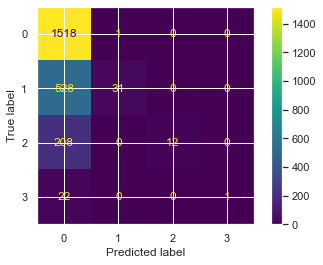

In [61]:
#print(confusion_matrix(y_test,pred_svm))

svm_cm=confusion_matrix(y_test,pred_svm, labels=svm.classes_)
svm_cmd=ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm.classes_)
svm_cmd.plot()

In [64]:
auc_svm = roc_auc_score(y_test, svm.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_svm * 100.0))

AUC: 61.66%


In [67]:
print("Accuracy: %.2f%%" % (acc_xgbt * 100.0))

Accuracy: 79.45%


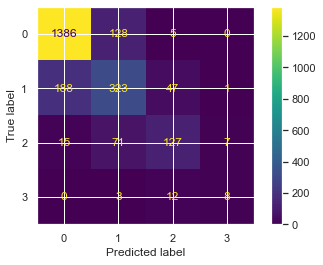

In [68]:
#print(confusion_matrix(y_test,pred_xgbt))

xgbt_cm=confusion_matrix(y_test,pred_xgbt, labels=xgbt.classes_)
xgbt_cmd=ConfusionMatrixDisplay(confusion_matrix=xgbt_cm, display_labels=xgbt.classes_)
xgbt_cmd.plot()